**Amara Khan <br>
MTH 337 - Report 4 <br>
ubitname: amarakha <br>
person#: 50035059 ** 

# Report 4: Newton in the Complex Plane
For report 4, we looked at Newton's method in the complex plane. Newton's method is a method using the first few terms of the Taylor Series to approximate the root of a function. We applied Newton's method in exercise one when we were looking at the roots of complex numbers.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In exercise one we created a numpy array named roots in class. Roots is comprised of three complex functions. We created two linspace arrays(x and y). x ranges from -1 to 1 and contains 500 equally spaced values within the range. y ranges from -1j to 1j and contains 500 equally spaced values within the range. We assign X and Y to a numpy meshgrid of x and y (the linspace arrays). Meshgrid, in python, creates a grid out of x and y values. niters is set to 200, because we will be going up to 200 iterations when applying newtons method. We then include a for loop, iterating through the range of niters=200. For each i in the range, we apply Newton's method, setting Z equal to $Z-(Z^3 -1)/(3Z^2)$. Convergance is checked for by setting tol equal to 0.01, then assigning 3 numpy arrays to the absolute value of Z-roots[] < tol. These 3 numpy arrays, root1, root2, and root3 will be plotted in Exercise 2. 

In [43]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
print(roots)
npts = 500
x = np.linspace(-1,1,npts)
y = np.linspace(-1j,1j,npts)
X,Y = np.meshgrid(x,y)
Z = X+Y
niters = 200
for i in range(niters):
    Z = Z- (Z**3 -1)/(3*Z**2) #where we are applying newton's method
tol = 0.01 #checking for convergence below
root1 = np.abs(Z-roots[0]) < tol
root2 = np.abs(Z-roots[1])<tol
root3 = np.abs(Z-roots[2])<tol

[ 1.0+0.j        -0.5+0.8660254j -0.5-0.8660254j]


## Exercise 2

In exercise 2, we get to see the roots that converged plotted with color. There is a symmetry about the graph generated. Looking at the colors from the graph, it is clear that a third of the points are generated from root1 array and so on. The graph I originally graphed wasn't as detailed. I made the graph a higher resolution by increasing the number of points that were checked for convergence at each iteration for each complex number. The number of points I increased back in Exercise 1, changing npts from 200 to 500. 

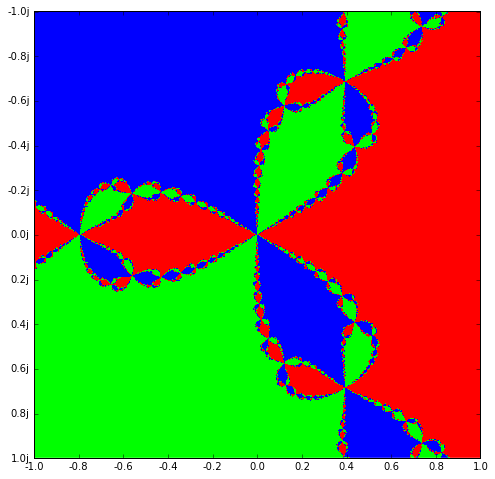

In [4]:
img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
plt.figure(figsize=(8,8))
plt.xticks(np.linspace(0,500,11), np.linspace(-1,1,11))
plt.yticks(np.linspace(0,500,11), [str(i)+'j' for i in np.linspace(-1,1,11)])
plt.imshow(img, interpolation = "none");


## Exercise 3

The goal of Exercise 3 was to zoom in on a part of the graph from Exercise 2. I had initially set an xlim and ylim, graphing only a certain range of the points generated. This returned a blurry, low resolution graph. The better approach, as shown below, is to set a smaller linspace. Now we are just saving and plotting a smaller set of points, rather than plotting a range of points from an array that can get distorted. The linspace for x and y go from 0 to .5, and 0j to .5j respectively. The area I zoomed in on was towards the center of the graph. I thought it was interesting due to the lines of symmetry of the graph going through the center. When zoomed in, the bottom right hand corner of the graph looks like the etire plot in Exercise 2 is repeated on a smaller scale. 

/Users/amarakhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide
/Users/amarakhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/Users/amarakhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/Users/amarakhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less
/Users/amarakhan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less


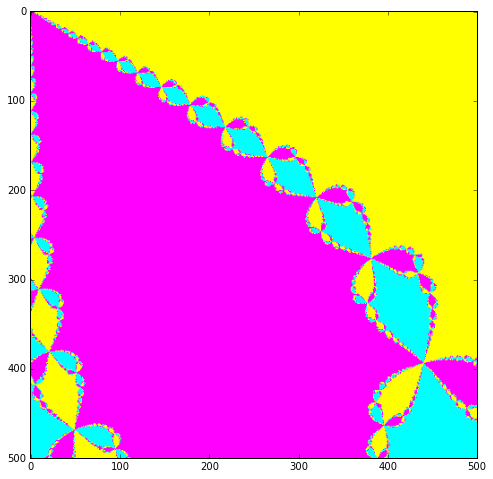

In [39]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
npts = 500
x = np.linspace(0,.5,npts)
y = np.linspace(0j,.5j,npts)
X,Y = np.meshgrid(x,y)
Z = X+Y
niters = 200
for i in range(niters):
    Z = Z- (Z**3 -1)/(3*Z**2) #where we are applying newton's method
tol = 0.01 #checking for convergence below
root1 = np.abs(Z-roots[0])< tol
root2 = np.abs(Z-roots[1])<tol
root3 = np.abs(Z-roots[2])<tol

img = np.zeros((npts,npts, 3))
img[root1] = [1,1,0]
img[root2] = [0,1,1]
img[root3] = [1,0,1]
plt.figure(figsize=(8,8))
plt.imshow(img);

## Exercise 4

The goal of exercise 4 is to graph the image in a range of color brightness to reflect the number of iterations taken to converge. The existing code had to be modified a bit. I set a counter, itercoun, equal to 0. I reduced niters to 60 for greater visibility of the brightness gradient. I made 3 numpy arrays of zeros, z0, z1, and z2. These are 2D arrays that have rows the size of the length of x and columns the size of the length of y. By iterating from 0 to niters, we apply newton's method and check for convergence. Also, we add 1 to the z0, z1, and z2 arrays at the indices from root0, root1, and root2. the itercount gets incremented by1. I checked that niters will be the largest possible number for iterations taken to converge. Thus I divided z0, z1, and z2 all by niters to get the arrays contents to be from 0 to 1. This will allow for the gradient when graphing.

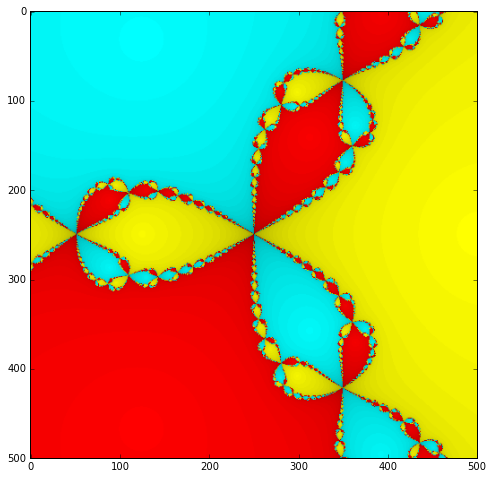

In [67]:
roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])
npts = 500
x = np.linspace(-1,1,npts)
y = np.linspace(-1j,1j,npts)
X,Y = np.meshgrid(x,y)
Z = X+Y
niters = 60
itercount = 0
tol = 0.01 
z0 = np.zeros((len(x),len(y))) #color this [1,1,0]
z1 = np.zeros((len(x),len(y))) #color this [0,1,1]
z2 = np.zeros((len(x),len(y))) #color this [1,0,1]
while itercount < niters :
    Z = Z- (Z**3 -1)/(3*Z**2) #where we are applying newton's method
    root0 = np.abs(Z-roots[0])<tol
    root1 = np.abs(Z-roots[1])<tol
    root2 = np.abs(Z-roots[2])<tol
    z0[root0] += 1
    z1[root1] += 1
    z2[root2] += 1
    itercount +=1

#print(z0[100])  
#prints out 0 if root did not converge, but if it did converge..prints out iterations 
#it has been since root converged.. so technically it is niters-#inarray..
#print(z0[100].size)
#print(np.amax(z0))
#print(np.amax(z1))
#print(np.amax(z2))
#checking for greatest number of iterations it converged to in 2D array so I know what to devide by
#dividing 

z0/=niters
z1/=niters
z2/=niters

img = np.zeros((npts,npts, 3))
img[:, :, 1] = z2+z0
img[:, :, 2] = z2
img[:,:,0] = z1+z0


#img[z1] = [0,1,1]
#img[z2] = [1,0,1]
plt.figure(figsize=(8,8))
plt.imshow(img);

The gradient shows that towards the center of the graph in the large areas of yellow, aqua, and red, more iterations were required to converge.

## Other things worth mentioning

I was curious how the graph would change based on a greater number of complex numbers within $cos(\frac{2i\pi}{n})$ and $sin(\frac{2i\pi}{n})$ for i in range n. I tried larger values for n and looked at the change in the graph. 

In [54]:
roots = np.array([complex(np.cos(2*np.pi*i/5), np.sin(2*np.pi*i/5)) for i in range(5)])
print(roots)
npts = 500
x = np.linspace(-1,1,npts)
y = np.linspace(-1j,1j,npts)
X,Y = np.meshgrid(x,y)
Z = X+Y
niters = 200
for i in range(niters):
    Z = Z- (Z**3 -1)/(3*Z**2) #where we are applying newton's method
tol = 0.01 #checking for convergence below
root1 = np.abs(Z-roots[0]) < tol
root2 = np.abs(Z-roots[1])<tol
root3 = np.abs(Z-roots[2])<tol
root4 = np.abs(Z-roots[3])<tol
root5 = np.abs(Z-roots[4])<tol

[ 1.00000000+0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
 -0.80901699-0.58778525j  0.30901699-0.95105652j]


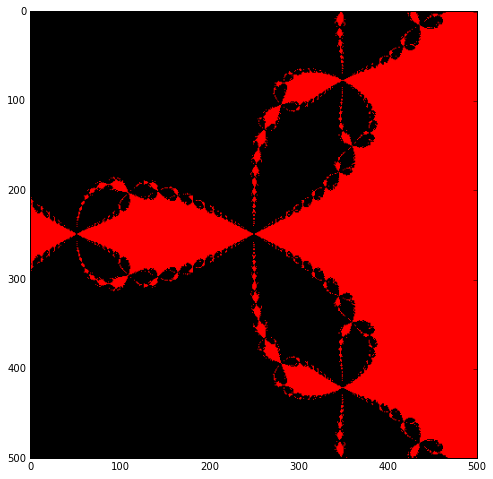

In [65]:
img = np.zeros((npts,npts, 3))
img[root1] = [1,0,0]
img[root2] = [0,1,0]
img[root3] = [0,0,1]
img[root4] = [1,0,1]
img[root5] = [1,1,0]

plt.figure(figsize=(8,8))
plt.imshow(img);

The graph generated from the 5 complex number has the same shape as when only using 3 complex numbers. This was not the result I expected. I also expected the graph to be more vibrant in color, from the other functions having some convergence values in their arrays. The black indicates points that did not converge, in other words were False. 